In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:Datasets/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **EDA**

In [6]:
df.dtypes.nunique()

3

In [7]:
df.select_dtypes(exclude = 'object').shape[1]

7

In [8]:
pd.DataFrame(df['Age'])

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [9]:
df[['Age']]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [10]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

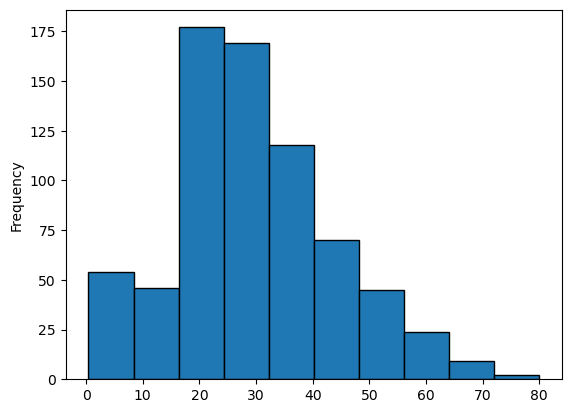

In [11]:
df['Age'].plot(kind = 'hist', edgecolor = 'black')

<Axes: ylabel='Density'>

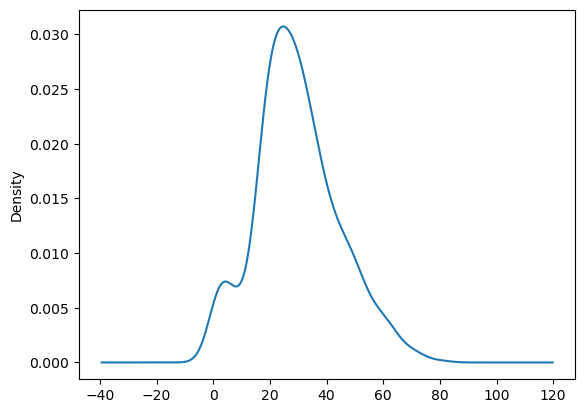

In [12]:
df['Age'].plot(kind = 'kde')

In [13]:
df['Age'].skew()

0.38910778230082704

<Axes: >

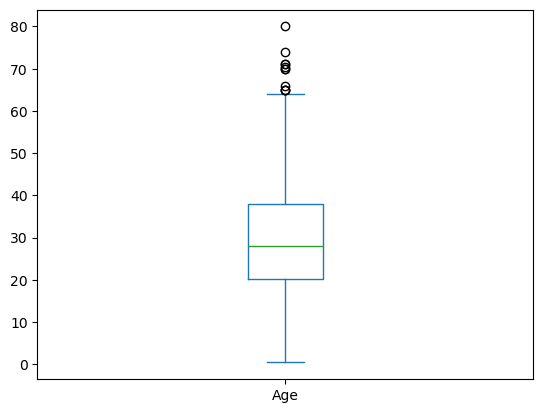

In [14]:
df['Age'].plot(kind = 'box')

In [15]:
df[df['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [16]:
(df['Age'].isna().sum() / len(df)) * 100

19.865319865319865

In [17]:
df[['Fare']]

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


In [18]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

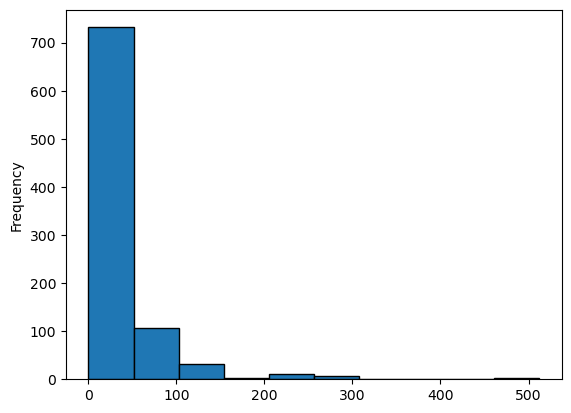

In [19]:
df['Fare'].plot(kind = 'hist', edgecolor = 'black')

In [20]:
df['Fare'].skew()

4.787316519674893

<Axes: ylabel='Density'>

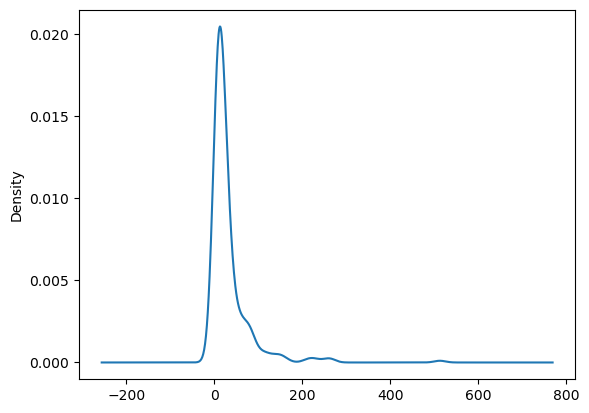

In [21]:
df['Fare'].plot(kind = 'kde')

<Axes: >

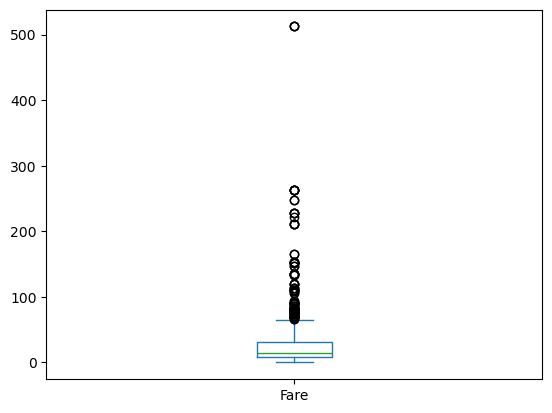

In [22]:
df['Fare'].plot(kind = 'box')

In [23]:
Q1 = df['Fare'].quantile(0.25)   
Q3 = df['Fare'].quantile(0.75)   
IQR = Q3 - Q1                   

lower_bound = Q1 - 1.5 * IQR    
upper_bound = Q3 + 1.5 * IQR    

print(f"Outlier Range for Fare: < {lower_bound} or > {upper_bound}")

Outlier Range for Fare: < -26.724 or > 65.6344


In [24]:
d = df[df['Fare']<65.6344]

In [25]:
d

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
(df['Fare'].isna().sum() / len(df)) * 100

0.0

In [27]:
df[df['Pclass']==1]['Age'].mean()

38.233440860215055

In [28]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [29]:
df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [30]:
df[df['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [31]:
df2 = pd.read_csv('C:Datasets/titanic_test.csv')
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [32]:
df=pd.concat([df,df2])

In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [34]:
df[df['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [35]:
df['Ticket'].value_counts()

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: count, Length: 929, dtype: int64

In [36]:
df['Individual_Fare'] = df['Fare'] / (df['SibSp']+df['Parch']+1)

In [37]:
df['Individual_Fare']

0        3.625000
1       35.641650
2        7.925000
3       26.550000
4        8.050000
          ...    
413      8.050000
414    108.900000
415      7.250000
416      8.050000
417      7.452767
Name: Individual_Fare, Length: 1309, dtype: float64

In [38]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_Fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000


In [39]:
df[['Individual_Fare', 'Fare']].describe()

,Individual_Fare,Fare
count,1308.000000,1308.000000
mean,20.518215,33.295479
std,35.774337,51.758668
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.512483,14.454200
75%,24.237500,31.275000
max,512.329200,512.329200


In [40]:
df['Family_size']=df['Parch']+df['SibSp']+1

In [41]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_Fare,Family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1


In [42]:
df['Family_size'].value_counts()

Family_size
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: count, dtype: int64

In [43]:
def transform_family_type(num):
    if num == 1:
        return 'alone'
    elif 2<=num<=4:
        return 'small family'
    else:
        return 'large family'

In [44]:
df['Family_type']=df['Family_size'].apply(transform_family_type)

In [45]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_Fare,Family_size,Family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small family
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small family
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small family
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone


In [46]:
df.groupby('Family_type')['Survived'].mean() * 100

Family_type
alone           30.353818
large family    16.129032
small family    57.876712
Name: Survived, dtype: float64

In [47]:
pd.crosstab(df['Survived'], df['Family_type'], normalize='columns')*100

Family_type,alone,large family,small family
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


<Axes: xlabel='Family_type', ylabel='Survived'>

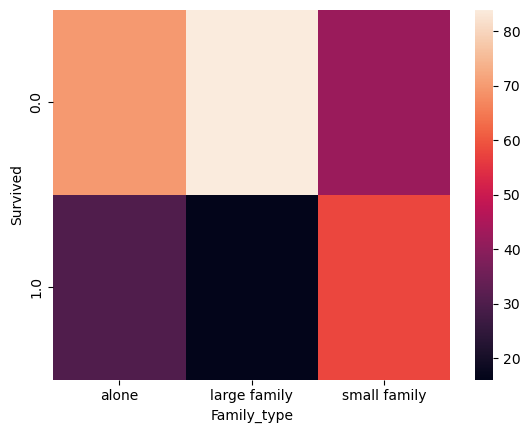

In [48]:
sns.heatmap(pd.crosstab(df['Survived'], df['Family_type'], normalize='columns')*100)

In [49]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [50]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# df['Title'] = df['Name'].str.split(',').str.get(1).str.split('.').str.get(0).str.strip()

In [51]:
df['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [52]:
df['Title'] = df['Title'].apply(lambda x: x if x in ['Mr', 'Mrs', 'Miss', 'Master'] else 'Other')
# or --> df['Title'] = df['Title'].str.replace('to','value')  but we have to write it multiple times

In [53]:
df['Title'].value_counts()

Title
Mr        757
Miss      260
Mrs       197
Master     61
Other      34
Name: count, dtype: int64

In [54]:
df.groupby('Title')['Survived'].mean() * 100

Title
Master    57.500000
Miss      69.780220
Mr        15.667311
Mrs       79.200000
Other     44.444444
Name: Survived, dtype: float64

In [55]:
pd.crosstab(df['Survived'], df['Title'], normalize='columns')*100

Title,Master,Miss,Mr,Mrs,Other
Survived,,,,,
0.0,42.5,30.21978,84.332689,20.8,55.555556
1.0,57.5,69.78022,15.667311,79.2,44.444444


<Axes: xlabel='Title', ylabel='Survived'>

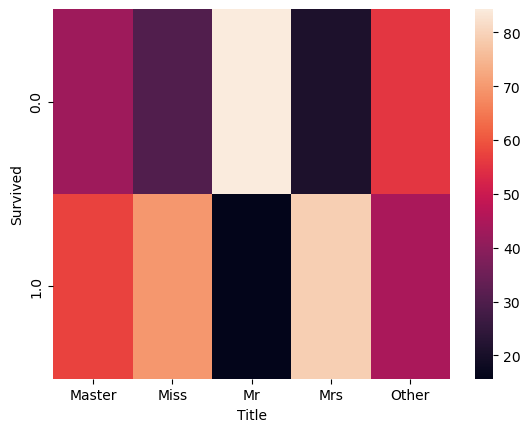

In [56]:
sns.heatmap(pd.crosstab(df['Survived'], df['Title'], normalize='columns')*100)

In [57]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 1309, dtype: object

In [58]:
df['Cabin'].isna().sum()

1014

In [59]:
df['Cabin'].fillna('M', inplace = True)

In [60]:
df['Cabin'].value_counts()

Cabin
M                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: count, Length: 187, dtype: int64

In [61]:
df['Deck'] = df['Cabin'].str.get(0)

In [62]:
df['Deck'].value_counts()

Deck
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [63]:
df.groupby('Deck')['Pclass'].count()

Deck
A      22
B      65
C      94
D      46
E      41
F      21
G       5
M    1014
T       1
Name: Pclass, dtype: int64

In [64]:
df.groupby('Deck')['Pclass'].value_counts()

Deck  Pclass
A     1          22
B     1          65
C     1          94
D     1          40
      2           6
E     1          34
      2           4
      3           3
F     2          13
      3           8
G     3           5
M     3         693
      2         254
      1          67
T     1           1
Name: count, dtype: int64

In [65]:
pd.crosstab(df['Deck'], df['Pclass'])

Pclass,1,2,3
Deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


<Axes: xlabel='Deck'>

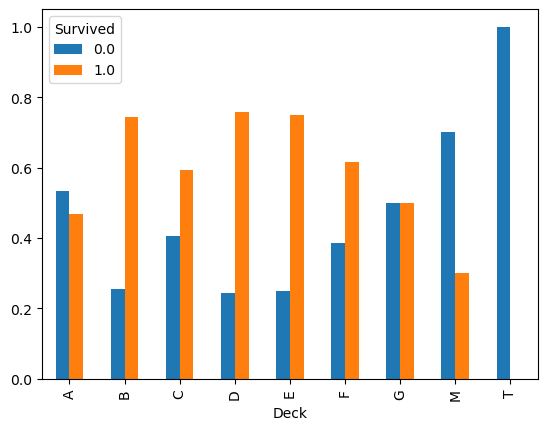

In [66]:
pd.crosstab(df['Deck'], df['Survived'], normalize = 'index').plot(kind = 'bar')

## Categorical Feature Analysis

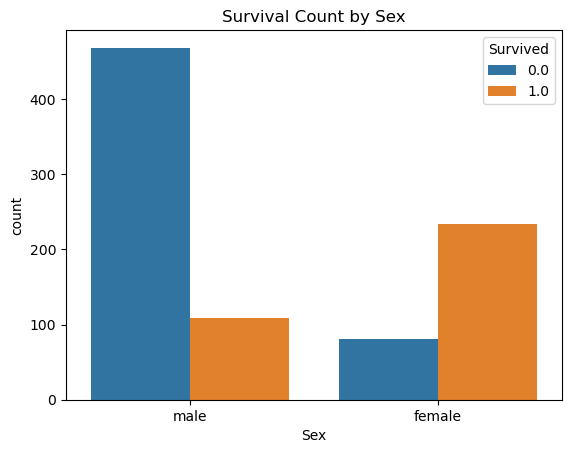

In [67]:
# Sex vs Survival
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Sex")
plt.show()

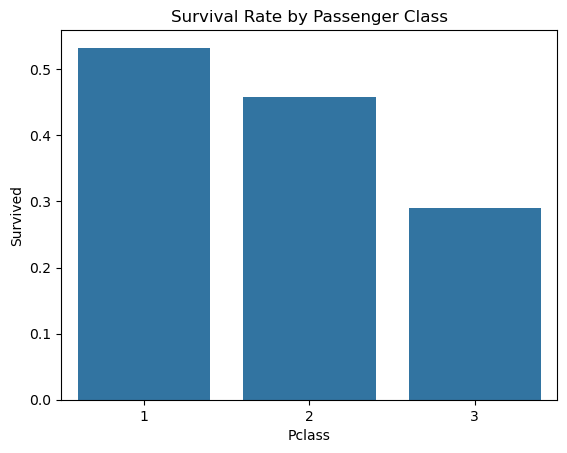

In [68]:
# Pclass vs Survival
sns.barplot(x='Pclass', y='Survived', data=df, ci=None)
plt.title("Survival Rate by Passenger Class")
plt.show()

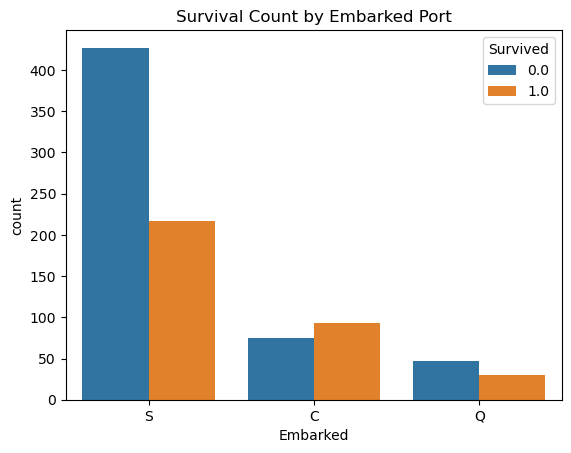

In [69]:
# Embarked vs Survival
sns.countplot(x='Embarked', hue='Survived', data=df.dropna(subset=['Survived']))
plt.title("Survival Count by Embarked Port")
plt.show()

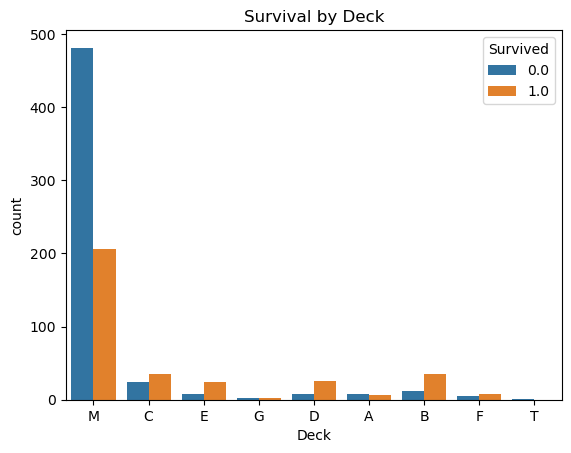

In [70]:
# Cabin → Extract Deck
df['Deck'] = df['Cabin'].astype(str).str[0]
sns.countplot(x='Deck', hue='Survived', data=df)
plt.title("Survival by Deck")
plt.show()

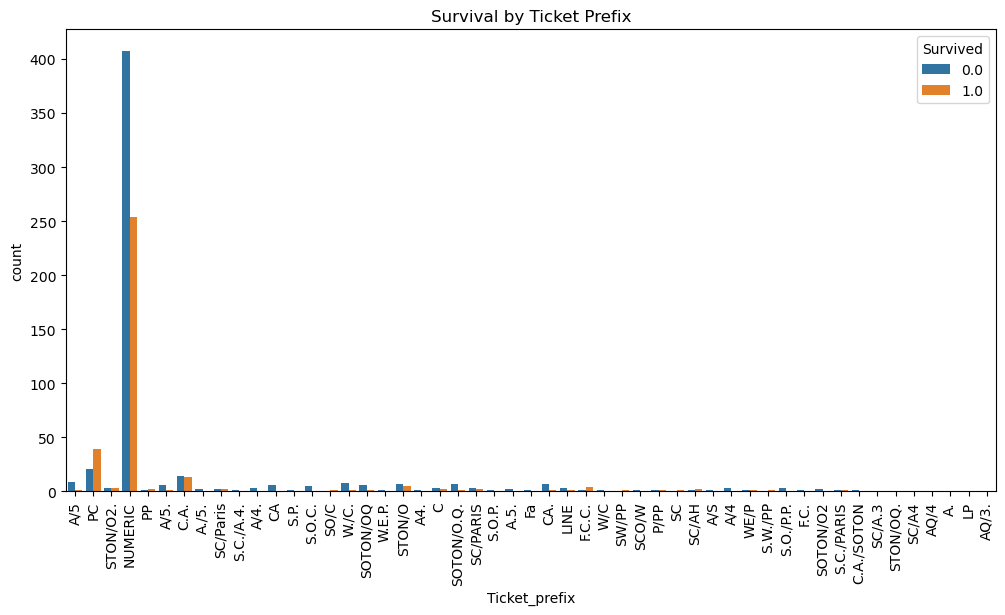

In [71]:
# Ticket → Extract Prefix (if any)
plt.figure(figsize=(12,6))
df['Ticket_prefix'] = df['Ticket'].str.split().str[0]
df['Ticket_prefix'] = df['Ticket_prefix'].apply(lambda x: x if not x.isdigit() else 'NUMERIC')
sns.countplot(x='Ticket_prefix', hue='Survived', data=df)
plt.xticks(rotation=90)
plt.title("Survival by Ticket Prefix")
plt.show()

## Bivariate Analysis

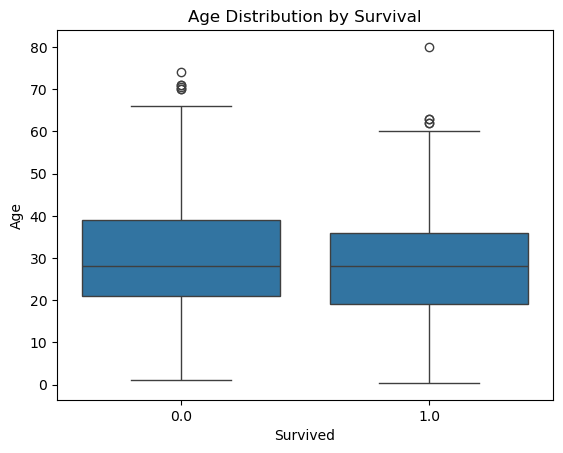

In [72]:
# Age vs Survival
df_train = df.dropna(subset=['Survived'])

sns.boxplot(x='Survived', y='Age', data=df_train)
plt.title("Age Distribution by Survival")
plt.show()


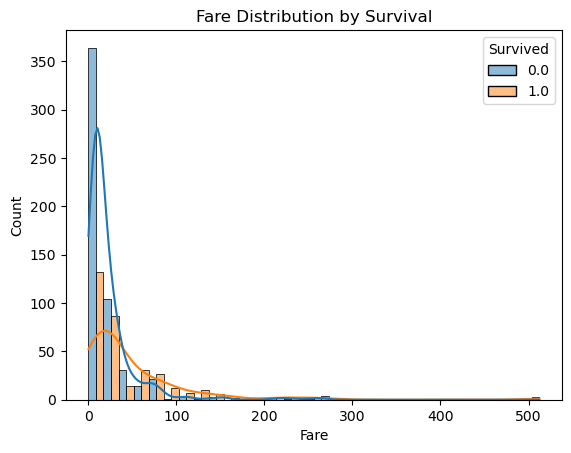

In [73]:
# Fare vs Survival
sns.histplot(data=df.dropna(subset = ['Survived']), x='Fare', hue='Survived', kde=True, bins=30, multiple = 'dodge')
plt.title("Fare Distribution by Survival")
plt.show()

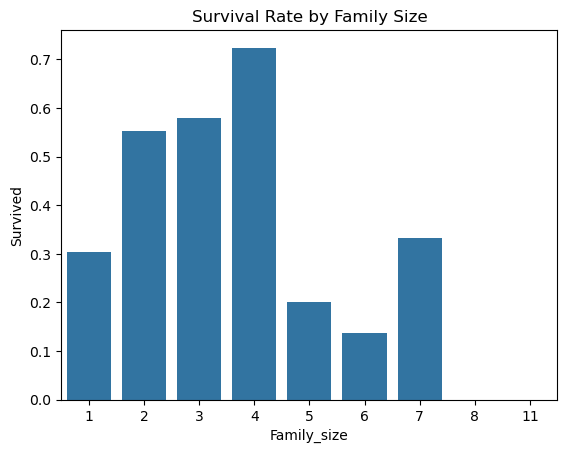

In [74]:
# Family Size vs Survival
sns.barplot(x='Family_size', y='Survived', data=df_train, ci=None)
plt.title("Survival Rate by Family Size")
plt.show()

# Correlation Matrix

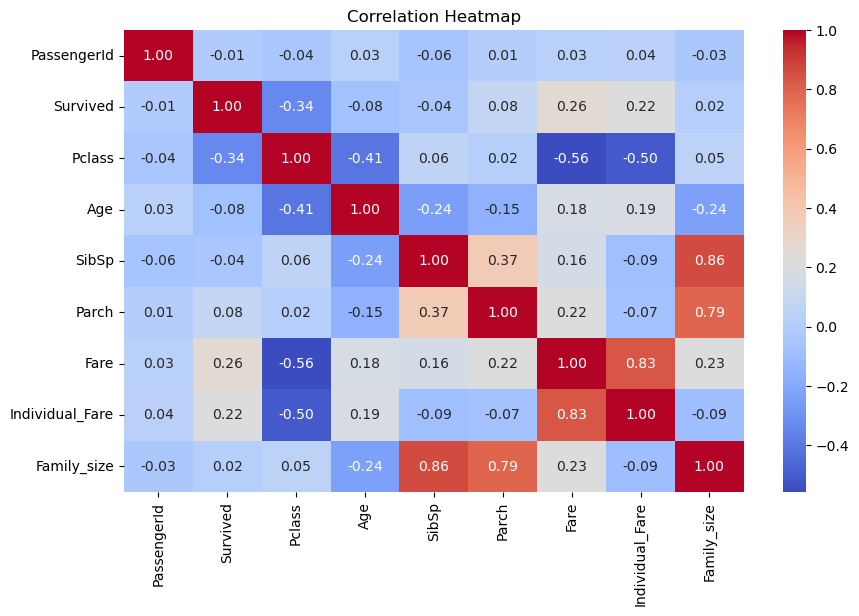

In [75]:
plt.figure(figsize=(10,6))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()


In [76]:
# Fill Age with median (better than mean due to skewed distribution)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Embarked with mode (most common value)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Fill Deck with 'Unknown' (since it's categorical)
df['Deck'] = df['Deck'].fillna('Unknown')

In [77]:
X = df_train.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df_train['Survived']

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [84]:
# Separate categorical and numeric features
categorical_cols = ['Sex', 'Embarked', 'Family_type', 'Title', 'Deck', 'Ticket_prefix']
numeric_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Individual_Fare', 'Family_size']

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),   # fill NaN with median
    ('scaler', StandardScaler())
])

In [85]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   # fill NaN with most common value
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [87]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numeric_cols),
        ('cat', cat_transformer, categorical_cols)
    ]
)

In [88]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [89]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare',
                                                   'Individual_Fare',
                                                   'Family_size']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked',
                                                   'Family_type', 'Title',
                                                   'Deck',
                                                   'Ticket_prefix'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

# Evaluation

In [90]:
y_pred = clf.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7933


In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       110
         1.0       0.74      0.71      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



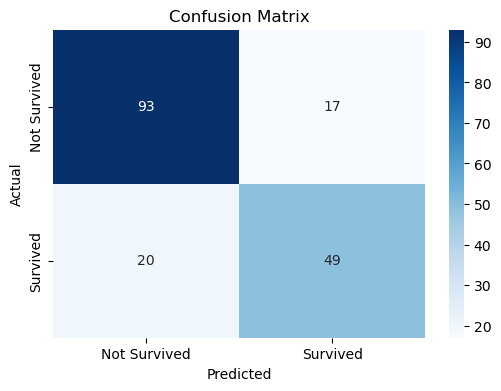

In [93]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived','Survived'], yticklabels=['Not Survived','Survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Why Random Forest Classifier was Chosen  

After evaluating multiple models (Logistic Regression, KNN, Decision Tree, Random Forest, and SVM), the **Random Forest Classifier** was selected as the final model for prediction.  

### Key Reasons for Choosing Random Forest:  

1. **Balanced Accuracy and Performance**  
   - Random Forest achieved an accuracy of **79.33%**.  
   - While accuracy alone is not sufficient, Random Forest provided a good trade-off between precision, recall, and overall stability.  

2. **Ability to Handle Non-Linearity and Interactions**  
   - Credit card default behavior (or Titanic survival, depending on dataset context) depends on multiple interacting factors.  
   - Random Forest captures **non-linear relationships** and **feature interactions** better than Logistic Regression and KNN.  

3. **Robustness Against Overfitting**  
   - Unlike a single Decision Tree, Random Forest aggregates many trees, which reduces overfitting and improves generalization.  
   - This makes it more reliable for unseen test data.  

4. **Feature Importance for Interpretability**  
   - Random Forest provides a ranking of **feature importance**, which helps identify which attributes (e.g., age, income, payment history, class, gender, etc.) contribute most to prediction.  
   - This interpretability is valuable for both business insights and model trust.  

### Conclusion  

Although SVM gave slightly higher accuracy, Random Forest was chosen because it strikes the best balance between **predictive power**
